# Projekt PSI
Analiza 5: co jest silniejsze w niespójnym warunku (inc): dźwięk vs obraz? a może negatywne vs pozytywne? (np. nieważne czy negatywny jest dźwięk czy obraz, ważne że co najmniej jedno jest negatywne i całość też jest negatywna)


## Loading data

In [18]:
%matplotlib inline
import os
import pandas
import matplotlib.pyplot as plt

# files that we use
if os.name == 'nt':
    bitalino_filename = 'bitalino\\1107_opensignals_prawestanowisko_2019-04-19_09-11-49.txt'
else:
    bitalino_filename = '../data/2019-afcai-spring/bitalino/1107_opensignals_prawestanowisko_2019-04-19_09-11-49.txt'




Ten sposób jakiś upośledzony jest, można to jakoś mądrzej zrobić. A i w sumie to nam to chyba nie potrzebne xd

In [19]:
hr = pandas.read_csv(bitalino_filename,
                     skiprows=[0,2],
                     header=1,
                     sep="\t",
                     names=[ "nSeq", "aa", "I2", "O1", "O2", "A5", "A6", "NaN"])
hr = hr.drop(["aa", "I2", "O1", "O2", "NaN"], 
             axis=1)
hr.head()

,nSeq,A5,A6
0,1,506,212
1,2,504,212
2,3,501,212
3,4,499,212
4,5,497,212


In [10]:
filename = 'IAPS.csv'
# filename = '../data/IAPS.csv'
images_params = pandas.read_csv(filename, 
                                sep=";",
                                header=0,
                                decimal=",")

filename = 'IADS2.csv'
# filename = '../data/IADS2.csv'
sounds_params = pandas.read_csv(filename, sep=";", header=0, decimal=",")

images_params.head()


,Description,IAPS,ValenceMean,ValenceSD,ArousalMean,ArousalSD,set
0,Snake,1019.0,3.95,1.96,5.77,1.83,12
1,Snake,1022.0,4.26,2.04,6.02,1.97,12
2,Snake,1026.0,4.09,1.91,5.61,2.23,16
3,Snake,1030.0,4.30,2.35,5.46,2.43,1
4,Snake,1033.0,3.87,1.94,6.13,2.15,18


In [13]:
filename = "procedura\\1107_2019_Apr_19_0712.txt"
# filename = "../data/procedura/1107_2019_Apr_19_0712.txt"
procedure = pandas.read_csv(filename,
                            sep="\t",
                            names=["person_id", "stimulus_id", "condition", "condition_details", "sound", "image", "widget", "response", "response_time", "timestamp" ])
procedure = procedure.loc[procedure['condition'] == 'inc'].loc[procedure['widget'] == 'emospace1']
procedure = procedure.join(sounds_params.set_index('Number'),
                           on="sound",
                           rsuffix='_sound')
procedure = procedure.join(images_params.set_index('IAPS'),
                           on='image',
                           rsuffix='_image')
procedure = procedure.astype({"response_time": float})
procedure.head()

,person_id,stimulus_id,condition,condition_details,sound,image,widget,response,response_time,timestamp,...,ValenceMean,ValenceSD,ArousalMean,ArousalSD,Description,ValenceMean_image,ValenceSD_image,ArousalMean_image,ArousalSD_image,set
6,1107,6,inc,p+s-,422,4800,emospace1,"[0.0, -0.8871154785156252]",2.803024,1.555651e+09,...,2.22,1.47,7.52,1.90,EroticCouple,6.44,2.22,7.07,1.78,6.0
7,1107,7,inc,p-s+,355,3150,emospace1,"[-0.889205932617187, 0.0]",2.419283,1.555651e+09,...,6.77,1.84,6.32,1.66,Mutilation,2.26,1.57,6.55,2.20,2.0
8,1107,8,inc,p+s-,277,4647,emospace1,"[-0.6720916748046881, -0.6839477539062505]",2.686227,1.555651e+09,...,1.63,1.13,7.79,1.63,EroticCouple,5.89,1.95,6.21,2.26,15.0
9,1107,9,inc,p+s-,719,5215,emospace1,"[-0.6523760986328123, 0.6662744140625002]",2.519347,1.555651e+09,...,2.89,1.67,6.91,2.02,Harbor,6.83,1.70,5.40,2.15,20.0
10,1107,10,inc,p-s+,311,8230,emospace1,"[-0.848992919921875, 0.0]",2.335886,1.555651e+09,...,7.65,1.58,7.12,1.83,Boxer,2.95,1.88,5.91,2.15,4.0


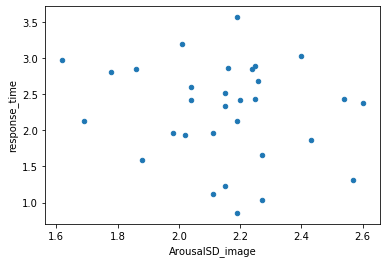

In [15]:
procedure.plot(kind='scatter', x='ArousalSD_image', y='response_time')

